In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. **train.csv** contains one set of SMS messages in English of 9543 messages, tagged acording being 0 (legitimate) or 1 (spam).
**test.csv** contains set of messages without any labels. we should predict the probability of these messages to be spam.
we train the model using logistic regression and got 95%.

In [87]:
df = pd.read_csv("train.csv")
df.head()

,Text,Class
0,I do.,0
1,What if anything was decided about whether I s...,0
2,H: If Roubini is right and he's been mostly ri...,0
3,HRC: Below is an oped on the National Security...,0
4,DQoNCg0KDQoNCg0KDQpHb29kIERheSwNCk1heSBpdCBub3...,1


In [19]:
df.isnull().sum()

Text     1
Class    0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(9542, 2)

In [32]:
df.groupby('Class').size()

Class
0    5393
1    4149
dtype: int64

In [22]:
df.reset_index(inplace=True)

In [23]:
df.drop(columns=['index'],inplace=True)

In [24]:
df

,Text,Class
0,I do.,0
1,What if anything was decided about whether I s...,0
2,H: If Roubini is right and he's been mostly ri...,0
3,HRC: Below is an oped on the National Security...,0
4,DQoNCg0KDQoNCg0KDQpHb29kIERheSwNCk1heSBpdCBub3...,1
...,...,...
9537,Assume jake and pir talked to u about,0
9538,Experience in Southeast Asia [John Carland]below,0
9539,ATTN=3AC=2EE=2EO=2FPRESIDENT=2E I know this me...,1
9540,"Dear Friend,How are you doing? I would be very...",1


In [25]:
df_test = pd.read_csv('test.csv')
df_test

,Text
0,"FROM BONGO WALEJOHANNESBURG,SOUTH AFRICA.TELL:..."
1,MR=2E DONALD COLLINSCREDIT MUTUEL DU SENEGAL B...
2,Meant to write that Solomon is a tough critic.
3,Well well
4,#226=2C TAYO RIMI=2CMEDINA=2CDAKAR=2C SENEGAL=...
...,...
2381,What about asking VMI to move to another day--...
2382,Asking to talk to you secureHoping to do it so...
2383,"I am Barrister Omoego Darris, an Internat..."
2384,Fyi - happy to give more context.


now we concatenate the test Data Frame and the train Data Frame

In [30]:
df_ = df.drop(columns=['Class'])
result = pd.concat([df_,df_test],ignore_index=True)

In [31]:
result.shape

(11928, 1)

In [29]:
import nltk
# nltk.download('stopwords')

preprocess is a function that first, replace the punctuation words with null, second delete low use words like 'the', 'and' using **stopwords**, in the end we stem the words for example we replace tasting, tastes with taste(convert the words to its root) using **snowballStemmer**

In [33]:
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
def preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

now here we get the out put text and give it to **TfidfVectorizer** function. this is a statistical method that Convert a collection of raw documents to a matrix of TF-IDF features.

In [34]:
textFeatures = result['Text'].copy()
textFeatures = textFeatures.apply(preprocess)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

c:\users\home\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass input=english as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [35]:
features

<11928x118147 sparse matrix of type '<class 'numpy.float64'>'
	with 915881 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.linear_model import LogisticRegression
y = df['Class'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [51]:
y.shape

(9542,)

In [52]:
X = features[0:9542,:]
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
LR = LogisticRegression(solver='saga').fit(X_train,y_train)
y_predict = LR.predict(X_test)

metrics are here

acc score is:  0.9591409114719749
[[ 781   74]
 [   4 1050]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1054
           1       0.99      0.91      0.95       855

    accuracy                           0.96      1909
   macro avg       0.96      0.95      0.96      1909
weighted avg       0.96      0.96      0.96      1909

f1-score is:  0.9589255156520845


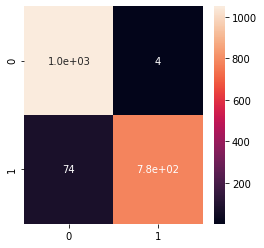

ROC-AUC Score is:  0.9548276129919993


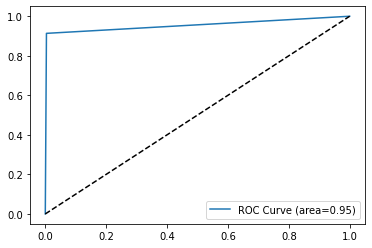

In [60]:
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, f1_score
print('acc score is: ',accuracy_score(y_test,y_predict))

print(confusion_matrix(y_test, y_predict, labels=[1,0]))
print (classification_report(y_test, y_predict))

print('f1-score is: ',f1_score(y_test, y_predict, average='weighted'))

import seaborn as sns
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

from sklearn.metrics import roc_auc_score, roc_curve
score = roc_auc_score(y_test, y_predict)
print('ROC-AUC Score is: ', score)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

In [61]:
LR = LogisticRegression(solver='saga').fit(X,y)

In [62]:
LR

LogisticRegression(solver='saga')

In [63]:
A = LR.predict_proba(features[9542:,:])

In [64]:
A.shape

(2386, 2)

In [65]:
A

array([[0.01855105, 0.98144895],
       [0.05747446, 0.94252554],
       [0.79417712, 0.20582288],
       ...,
       [0.00850374, 0.99149626],
       [0.95742906, 0.04257094],
       [0.94882719, 0.05117281]])

In [75]:
res = A[:,1]

In [76]:
res.shape

(2386,)

In [77]:
res

array([0.98144895, 0.94252554, 0.20582288, ..., 0.99149626, 0.04257094,
       0.05117281])

In [78]:
res_spam = A[:,1]

In [79]:
res_spam

array([0.98144895, 0.94252554, 0.20582288, ..., 0.99149626, 0.04257094,
       0.05117281])

In [80]:
submit = pd.DataFrame(data=res_spam,columns=['A'])

In [81]:
submit

,A
0,0.981449
1,0.942526
2,0.205823
3,0.142033
4,0.998236
...,...
2381,0.158787
2382,0.067492
2383,0.991496
2384,0.042571


this is the probibility of being spam in test.csv